In [2]:
import tqdm
import pandas as pd
from Bio import SeqIO
from ete3 import PhyloTree

from src.utils import release_mutations_from_two_seqs

In [3]:
PATH_TO_DATA = '/media/mr/const1/projects/COVID19/data/'
PATH_TO_MULAL = PATH_TO_DATA + 'mulal_gisaid_2021-01-22.filtered.fasta'
PATH_TO_DISTRIBUTION_DF = '../data/mutation_number_distribution.csv'
PATH_TO_TREE = '../data/mulal_gisaid_2021-01-22.filtered.fasta.tre.pruned-simple.resolved.wo_pakistan'
PATH_NEW_MULAL = PATH_TO_DATA + 'mulal_gisaid_2021-01-22.filtered.twice.fasta'

DIFFERENCE_CUTOFF = 38  # delete all seqs that >38 nucleotides differ from refenence

In [4]:
def write_new_mulal():
    df = pd.read_csv(PATH_TO_DISTRIBUTION_DF)
    sub_df = df[(df.difference > DIFFERENCE_CUTOFF)]
    nodes_to_delete = set(sub_df.name.values)

    reader = SeqIO.parse(PATH_TO_MULAL, 'fasta')

    with open(PATH_NEW_MULAL, 'w') as writer:
        ndroped = 0
        for i, record in tqdm.tqdm(enumerate(reader), total=164688):
            if record.id in nodes_to_delete:
                ndroped += 1
                continue

            header = record.id
            seq = str(record.seq)

            writer.write('>' + header + '\n')
            writer.write(seq + '\n')

    assert len(nodes_to_delete) == ndroped, (
        f"{len(nodes_to_delete)} != {ndroped}, smt doesn't deleted"
    )

In [ ]:
# write_new_mulal()

# used_tree = PhyloTree(PATH_TO_TREE)

# print('num of seqs to drop')
# print(sub_df.shape[0])
# print('num of seqs that in the tree')
# print(len(set(nodes_to_delete).difference(used_tree.get_leaf_names())))

In [5]:
def look_at_3rd_mode_of_distribution():
    """print mutations of some seqs with determined num of mutations"""
    reader = SeqIO.parse(PATH_TO_MULAL, 'fasta')
    ref = next(reader)
    assert ref.id == "external/NC_045512.2"
    refseq = str(ref.seq)

    df = pd.read_csv(PATH_TO_DISTRIBUTION_DF)
    sub_df = df[(df.difference > 47) & (df.difference < 56)]

    for name, dist in sub_df.values:
        for record in reader:
            if record.id == name:
                break

        cur_seq = str(record.seq)
        mutations = release_mutations_from_two_seqs(refseq, cur_seq)
        mutations = [x for x in mutations if x[2] == '-']
        print(name, dist)
        print(mutations)
        print()

In [7]:
df = pd.read_csv(PATH_TO_DISTRIBUTION_DF)

<AxesSubplot:ylabel='Frequency'>

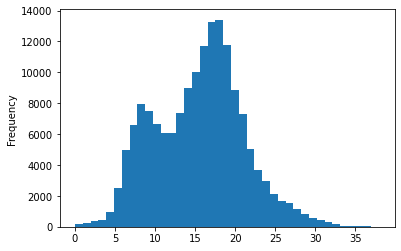

In [16]:
df[df.difference < 39].difference.plot.hist(bins=39)

## Нарисовал в R